# TiNNy - Regression Demo

Welcome to the TiNNy Regression Demo! In this interactive demonstration, we'll be exploring the regression capabilities of TiNNy using two distinct datasets: the exploration of real estate values with the Boston house prices dataset, and an insightful analysis of diamond prices.

Dan B. (2018). Housing Prices Competition for Kaggle Learn Users. Kaggle. https://kaggle.com/competitions/home-data-for-ml-course

Swati Khedekar. (2023). Data Analysis on Diamonds Dataset. Kaggle. https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond/data

In [1]:
# Import modules

import tinny
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
warnings.filterwarnings('ignore')

## Dataset 1 - Boston House Price Prediction

### Data loading and preparation

In order for TiNNy to work, both X and Y must be numpy arrays and have the following shape: `(NUMBER_SAMPLES, NUMBER_FEATURES)`. Y can also just be a vector `(NUMBER_SAMPLES,)`

In [2]:
df = pd.read_csv('./data/regression/BostonHouses/boston.csv').values

X_train = df[:, :-1]  
y_train = df[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=400, random_state=42)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

m, n = X_train.shape

print(X_train.shape, y_train.shape)

(400, 13) (400, 1)


### Creating a TiNNy Network

Building a TiNNy network involves defining its architecture by specifying the layers that make it up. Here’s how you can effortlessly construct your network:

1. Layer Specifications: Each layer within the network requires three key pieces of information:
    - The number of inputs it will receive. In the case of the first layer, this will be the number of features.
    - The number of neurons (or units) it contains.
    - The activation function to apply to its outputs.

2. Layer Types: Our network can incorporate both Dense layers and an Output layer. For this demonstration:
    - Dense Layer: We will utilize the ReLU (Rectified Linear Unit) activation function, configuring this layer with 32 neurons.
    - Output Layer: Given the regression, non-negative nature of our problem, the ReLU activation function is employed to handle the output layer effectively.

3. Network Configuration: To finalize the TiNNy network setup, we specify:
    - The type of problem we are addressing (either regression or classification).
    - The loss function to optimize during training.
    - The layers that constitute the network architecture.

In [12]:
l1 = tinny.DenseLayer(n, 32, "ReLU")
l2 = tinny.OutputLayer(32, 1, "ReLU")
nn = tinny.TiNNyNetwork(problem_type="regression", loss_function="mse", layers=[l1, l2])

### Visualizing the TiNNy Network

To visualize the architecture of our TiNNy network, employ the `render()` method. This functionality provides a graphical representation of the network's structure, showcasing the configured layers. Even though TiNNy makes use of fully-connected neural networks, `render()` only displays one connection to improve visibility in the diagram.

*NOTE: You need to have Graphviz installed on your Path in order for `render()` to work. You can install graphviz from [here](https://graphviz.org/download/).*

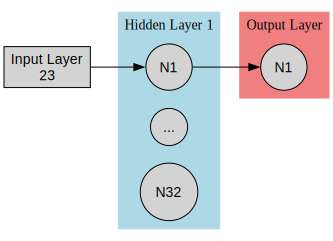

In [13]:
nn.render()

### Training and Testing Our Network

Training our neural network involves specifying the number of epochs (iterations) and setting the learning rate, which are crucial parameters that influence the model's convergence and performance. 

Upon testing our neural network, visualizing the performance becomes essential. One effective method is plotting the scatter plot. This visualization maps the predicted values against the actual values, offering a clear visual representation of the model's precision. In an ideal scenario, the data points will align closely with the diagonal line, indicating high accuracy in continuous value predictions.

(13, 400) (1, 400)
Iteration 0
Loss: 0.15682028781084165
Iteration 10
Loss: 0.087497556353333
Iteration 20
Loss: 0.06010845888497321
Iteration 30
Loss: 0.04900234309156427
Iteration 40
Loss: 0.04350939420109204
Iteration 50
Loss: 0.04011751594358194
Iteration 60
Loss: 0.03763128458776169
Iteration 70
Loss: 0.035602093942653505
Iteration 80
Loss: 0.03385722300725082
Iteration 90
Loss: 0.032317188123565425
Iteration 100
Loss: 0.030947158802657013
Iteration 110
Loss: 0.02970340741807753
Iteration 120
Loss: 0.028554269366739538
Iteration 130
Loss: 0.02750227363167757
Iteration 140
Loss: 0.026542112014755412
Iteration 150
Loss: 0.025651195598324475
Iteration 160
Loss: 0.024829701385190663
Iteration 170
Loss: 0.02407828214857902
Iteration 180
Loss: 0.023386762004217843
Iteration 190
Loss: 0.0227445750686613
Iteration 200
Loss: 0.022151093823734973
Iteration 210
Loss: 0.021605275646852617
Iteration 220
Loss: 0.02109438471262642
Iteration 230
Loss: 0.020615278690914743
Iteration 240
Loss: 0.02

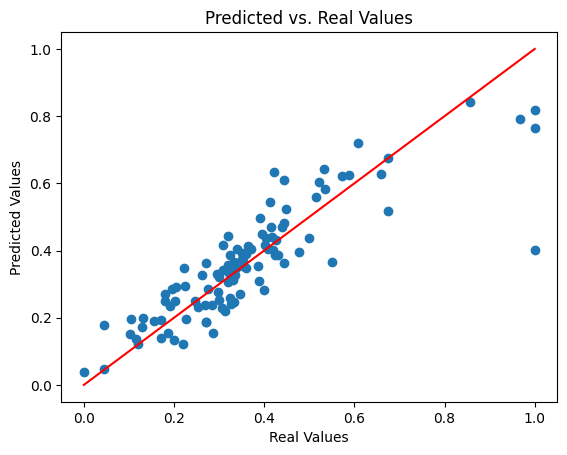

In [5]:
nn.train(X_train, y_train, iterations=1000, learning_rate=0.0015)
nn.test(X_test, y_test, plot=True)

## Dataset 2 - Diamond Price Prediction

This dataset is quite sizable, comprising approximately 50,000 instances, each with 23 features. Training times may vary significantly based on your CPU's capabilities, as TiNNy operates without the aid of optimizers or Tensor processing.

### Data loading and preparation

In [6]:
# Load dataset
df = pd.read_csv('./data/regression/DiamondPrices/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Prepare data for the neural net
df.drop('Unnamed: 0',axis='columns',inplace=True)
df.drop_duplicates(inplace=True)
df=pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)

X=df.drop(['price'],axis=1).values
y=df[['price']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

m, n = X_train.shape

print(X_train.shape, y_train.shape)

(48414, 23) (48414, 1)


### Train and test

In [8]:
l1 = tinny.DenseLayer(n, 128, "ReLU")
l2 = tinny.OutputLayer(128, 1, "ReLU")
nn = tinny.TiNNyNetwork(problem_type="regression", loss_function="mse", layers=[l1, l2])

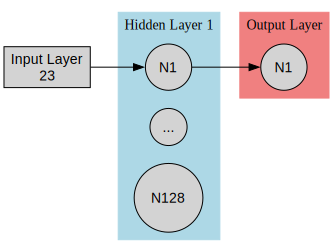

In [9]:
nn.render()

(23, 48414) (1, 48414)
Iteration 0
Loss: 0.5474183944478627
Iteration 10
Loss: 0.0828279178423345
Iteration 20
Loss: 0.06661645972503687
Iteration 30
Loss: 0.05732107734302426
Iteration 40
Loss: 0.05073757051480174
Iteration 50
Loss: 0.045531383048365626
Iteration 60
Loss: 0.041079421613749285
Iteration 70
Loss: 0.0372245421144546
Iteration 80
Loss: 0.03390006316160828
Iteration 90
Loss: 0.031034649238783154
Iteration 100
Loss: 0.028542903329619063
Iteration 110
Loss: 0.02634841185613444
Iteration 120
Loss: 0.024391653776647138
Iteration 130
Loss: 0.022625527301512714
Iteration 140
Loss: 0.02103321843498763
Iteration 150
Loss: 0.019600910711739482
Iteration 160
Loss: 0.018320411578182833
Iteration 170
Loss: 0.01718124531036792
Iteration 180
Loss: 0.01616467395466141
Iteration 190
Loss: 0.015252667904256547
Iteration 200
Loss: 0.014432353610665711
Iteration 210
Loss: 0.013696030003542069
Iteration 220
Loss: 0.013033859662760362
Iteration 230
Loss: 0.012436961822463137
Iteration 240
Loss

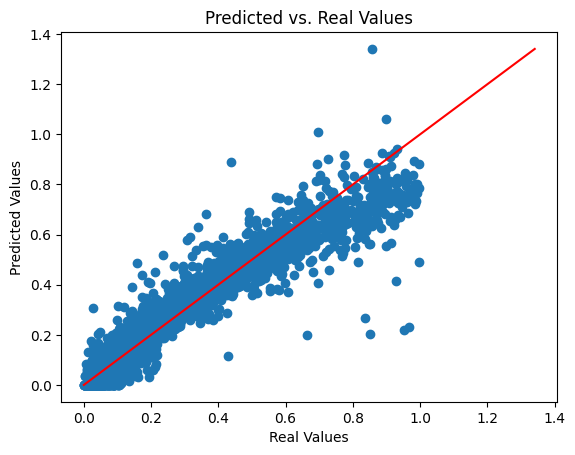

In [10]:
nn.train(X_train, y_train, iterations=1500, learning_rate=0.00015)
nn.test(X_test, y_test, plot=True)